## Level 2

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
dw = 0.1
phi = 0.01

om_v0 = 1

In [49]:
def s(x):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] > 10 and x[i] < 90:
            y[i] = np.pi / (80*om_v0)
        else:
            y[i] = 0
    return y

def H(t):
    if t > 10 and 10 < 90:
        s = np.pi / (80*om_v0)
    else:
        s = 0

    y = -0.5 * om_v0 * s * np.array([[0, np.exp(1j * (dw*t + phi))], [np.exp(-1j * (dw*t + phi)), 0]])
    return y


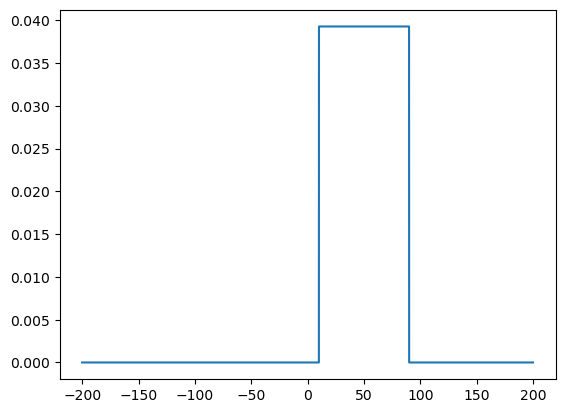

In [20]:
x = np.linspace(-200, 200, 10000000)

plt.plot(x, s(x))
plt.show()

In [33]:
for i in range(3):
    print(H(i))

print(H(50))

[[-0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j]]
[[-0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j]]
[[-0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j]]
[[-0.       +0.j        -0.0057577+0.0187718j]
 [-0.0057577-0.0187718j -0.       +0.j       ]]


In [60]:
T = 10000
dt = 0.001

u0 = np.array([[1, 0], [0, 1]])
print(u0)
print(u0.shape)

[[1 0]
 [0 1]]
(2, 2)


In [61]:
current_u = u0
u_list = []

for t in range(T):
    u_list.append(current_u)
    dudt = -1j * H(dt*t) * current_u
    temp_u = current_u + dudt*dt
    current_u = temp_u

In [62]:
print(len(u_list))

for i in range(3):
    print(u_list[i])

10000
[[1 0]
 [0 1]]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


In [66]:
ut = np.array(u_list)
print(ut.shape)

(10000, 2, 2)


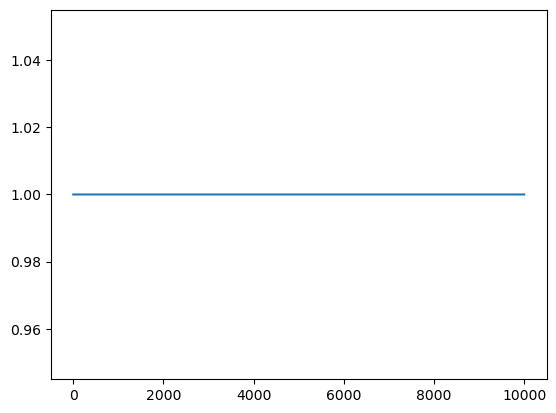

In [68]:
plt.plot(ut[:, 0, 0].real)
plt.show()